## Business Case Analysis:

This heart disease prediction aim to detect the presence or risk of heart disease in the person based on their medical attributes. For this, we use a representative data set that includes medical histories and attribute information for several patients. Moreover, data processing, exploratory data analysis, and some data visualization bring out new insights from a medical dataset. For example, using some data processing on our heart disease data, we saw how thalassemia was the most significant deciding factor in heart disease diagnosis. Medical experts can use data science to back their diagnosis, and even improve and hasten the treatment.

## Domain Analysis

Heart disesase means Cardivasucular(CVD) dieseases which including hypertension, Caronary heartdiesease and stroke.
CVDs is number one cause of death in the world
On average about 2400 deaths from CVDs each day based on clinical data.
In this notebook i will try to unleash useful insights using this heart disease datasets and by building stacked ensemble model by combining the power of best performing machine learning algorithms.

## Dataset description:

The given dataset contains data about Heart disease Prediction in total three data types i.e.,float,int,object.Mainly observe that the data is belongs to supervised domain.The attribute information regarding this dataset is:

There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below=> There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the      section below.=> 
slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of         blood flow to the heart=> thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect,                 reversible_defectc=> t
resting_blood_pressure (type: int): resting blood prechest_pain_type (type: int): chest pain type (4 value=> s)
num_major_vessels (type: int): number of major vessels (0-3) colored by flouros=> opy
fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 m=> g/dl
resting_ekg_results (type: int): resting electrocardiographic results (values 0=> ,1,2)
serum_cholesterol_mg_per_dl (type: int): serum cholestoral in=>  mg/dl
oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocard=> iograms
sex (type: binary): 0: female,=>  1: male
age (type: int): age=>  in years
max_heart_rate_achieved (type: int): maximum heart rate achieved (beats p=> er minute)
exercise_induced_angina (type: binary): exercise-induced chest pain (0: Fals
TARGET VARIABLE:
=> Heart diesease present(Binary class 0:No heart diesease 1:Heart diesease present), 1: True)​Iorease prediction

## Import Libraries and Load the Dataset

In [1]:
import warnings
warnings.filterwarnings ('ignore')

# data import & pre-processing
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# cross validation
from sklearn.model_selection import cross_val_score

# model evaluation metrics
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier



In [2]:
df1=pd.read_csv('labels.csv')

In [3]:
df2=pd.read_csv('values.csv')

In [4]:
df=pd.merge(df2,df1)

## EDA(Exploratory Data Analysis)

#### Basic checks

In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [7]:
df.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [8]:
df.shape

(180, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [10]:
df.describe().T  ## Statstical information

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


As we can see from above description resting_blood_pressure, serum_cholesterol_mg_per_dl and oldpeak_eq_st_depression have some outliers 

In [11]:
df.describe(include='O')

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


#### Univariant Analysis

In [12]:
df.drop('patient_id', axis=1, inplace=True)

#### Distribution of heart_disease_present (target variable)

In [13]:
df.heart_disease_present.value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

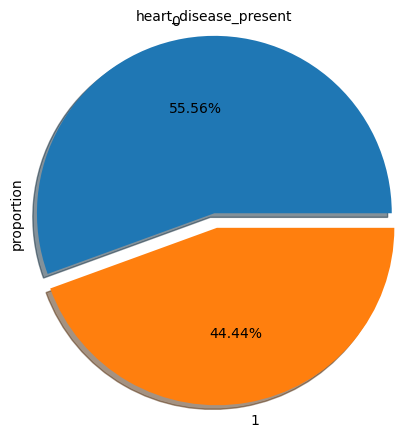

In [14]:
explode = [0,0.1] # To slice the perticuler section
textprops = {"fontsize":10} # Font size of text in pie chart

plt.title('heart_disease_present',{"fontsize":10})

df.heart_disease_present.value_counts(normalize=True).plot.pie(autopct = "%0.2f%%",explode = explode,textprops=textprops, shadow = True,radius = 1.2)

plt.show() # To show pie chart only

The dataset is balanced having 100 (56%) No heart diesease (0) and 80(44%) have Heart diesease patients (1)

In [15]:
## Renaming some features for easy undestanding

df.rename({'slope_of_peak_exercise_st_segment':'st_slope','fasting_blood_sugar_gt_120_mg_per_dl':'fasting_blood_sugar',
          'serum_cholesterol_mg_per_dl':'serum_cholestero','oldpeak_eq_st_depression':'oldpeak_st',
           'max_heart_rate_achieved':'max_heart_rate','resting_ekg_results':'restig_ecg_results'},axis=1, inplace=True)

In [16]:
df.columns

Index(['st_slope', 'thal', 'resting_blood_pressure', 'chest_pain_type',
       'num_major_vessels', 'fasting_blood_sugar', 'restig_ecg_results',
       'serum_cholestero', 'oldpeak_st', 'sex', 'age', 'max_heart_rate',
       'exercise_induced_angina', 'heart_disease_present'],
      dtype='object')

In [17]:
## Categorical columns

df_cat=df[['thal','sex','st_slope','chest_pain_type','num_major_vessels','fasting_blood_sugar',
           'restig_ecg_results','exercise_induced_angina',]]

In [18]:
## Numerical columns
df_num=df[['resting_blood_pressure','serum_cholestero','oldpeak_st','age','max_heart_rate',]]

In [19]:
df_cat

,thal,sex,st_slope,chest_pain_type,num_major_vessels,fasting_blood_sugar,restig_ecg_results,exercise_induced_angina
0,normal,1,1,2,0,0,2,0
1,normal,0,2,3,0,0,0,0
2,normal,1,1,4,3,0,2,1
3,reversible_defect,1,1,4,0,0,0,0
4,reversible_defect,1,3,1,0,0,2,0
...,...,...,...,...,...,...,...,...
175,reversible_defect,1,2,4,2,1,0,0
176,normal,0,2,4,0,0,1,1
177,reversible_defect,1,2,3,0,0,0,1
178,normal,1,1,3,2,1,0,0


In [20]:
df_num

,resting_blood_pressure,serum_cholestero,oldpeak_st,age,max_heart_rate
0,128,308,0.0,45,170
1,110,214,1.6,54,158
2,125,304,0.0,77,162
3,152,223,0.0,40,181
4,178,270,4.2,59,145
...,...,...,...,...,...
175,125,254,0.2,67,163
176,180,327,3.4,55,117
177,125,309,1.8,64,131
178,124,255,0.0,48,175


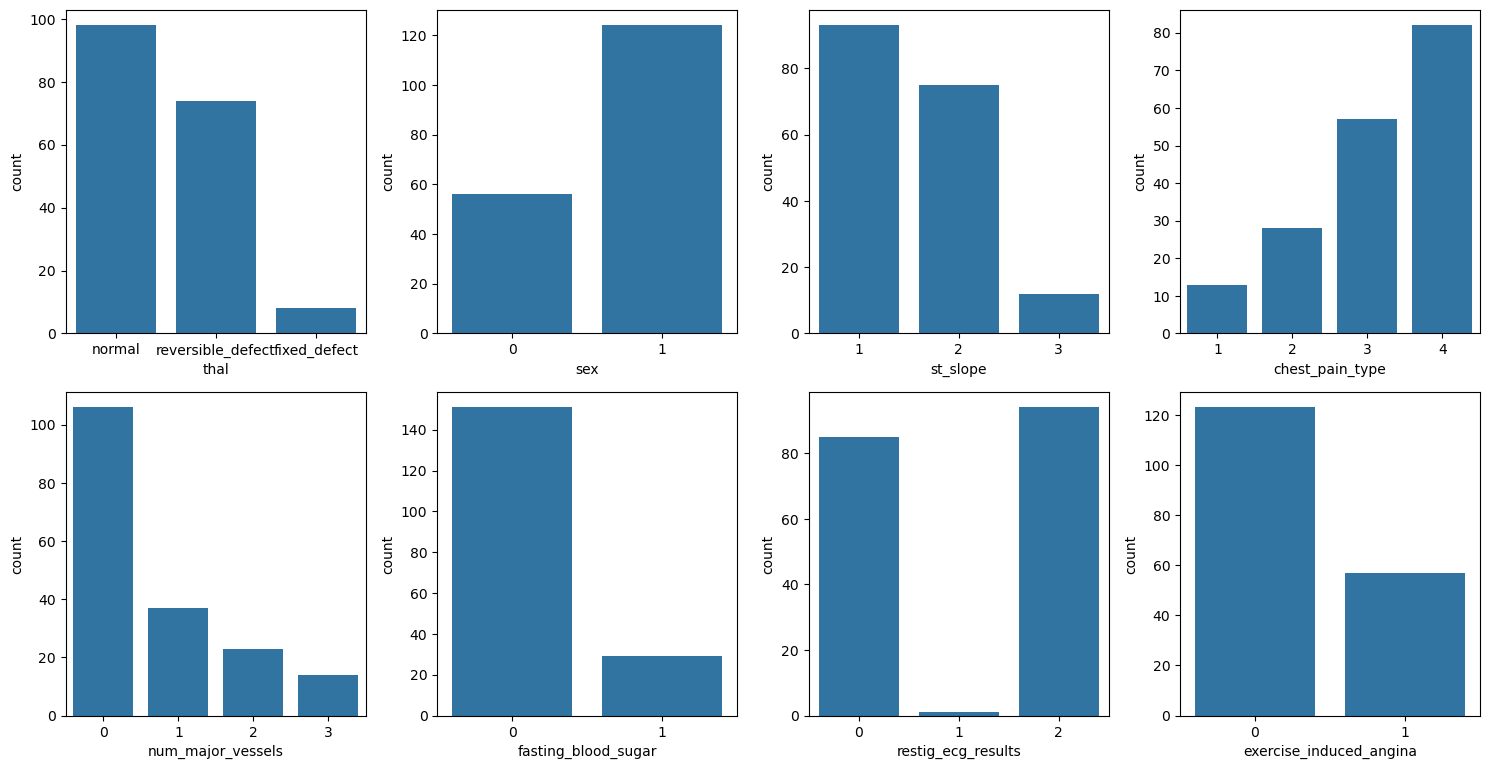

In [21]:
## Categorical univariant analysis

plt.figure(figsize=(15,15))
plotnumber = 1
for i in df_cat:
    plt.subplot(4, 4, plotnumber)
    sns.countplot(x = df_cat[i])
    plotnumber = plotnumber+1
plt.tight_layout()

As we can see from above plot, in this dataset 1(males) count is way too higher than 0(females)
 In Thal(results of thallium stress test) 54% belogs to normal  and 41% belongs reversible defect followed by fixed defect
 In chest pain type 45% belong to 4 and 31% belong to 3 and 15% belong to 2 followed 7% belong to 1
 In number of major vessels (0-3) colored by flourosop 58% belong to 0 and 20% belong to 1 and 12% belong to 2 followed 7% belong to 3
 in fasting_blood_sugar_gt_120_mg_per_dl 83% belong to 0 remaining 17% belong to 1
 In resting_ekg_results 52% belong to 2 and 47% belong to 0 
 In exercise_induced_angina 68% belong to 0 remaining 32% belong to 1

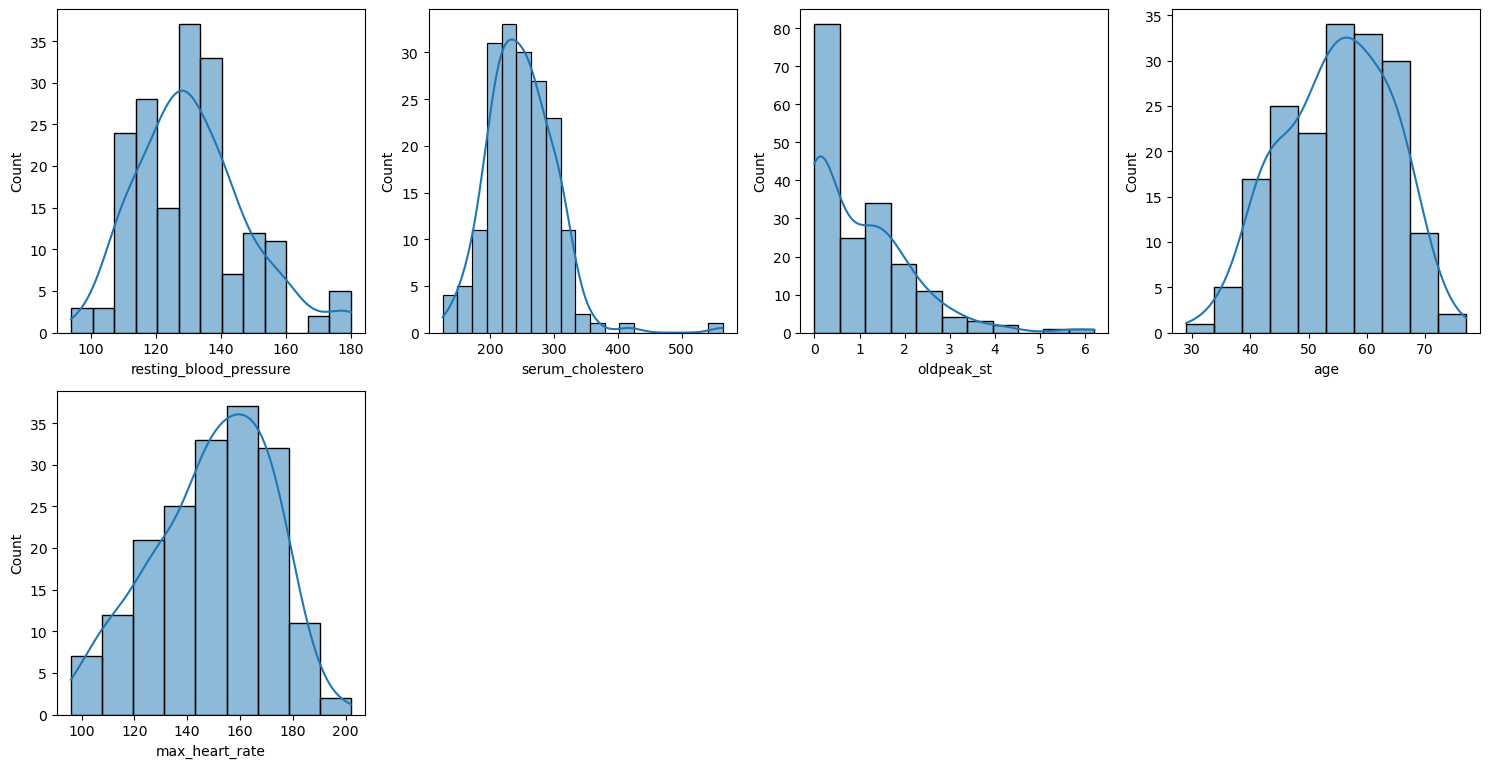

In [22]:
## Numerical univariant analysis

plt.figure(figsize=(15,15))
plotnumber = 1
for i in df_num:
    plt.subplot(4, 4, plotnumber)
    sns.histplot(x = df_num[i],kde = True)
    plotnumber = plotnumber+1
plt.tight_layout()

 Most of resting blood pressure range between 120 to 140
 Most of serum_cholesterol_mg_per_dl range between 200 to 300
 Average age of patients is around 55 to 60.
 maximum heart rate achieved range between 150 to 170

In [23]:
df.heart_disease_present.value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

### Bi-Variant analysis

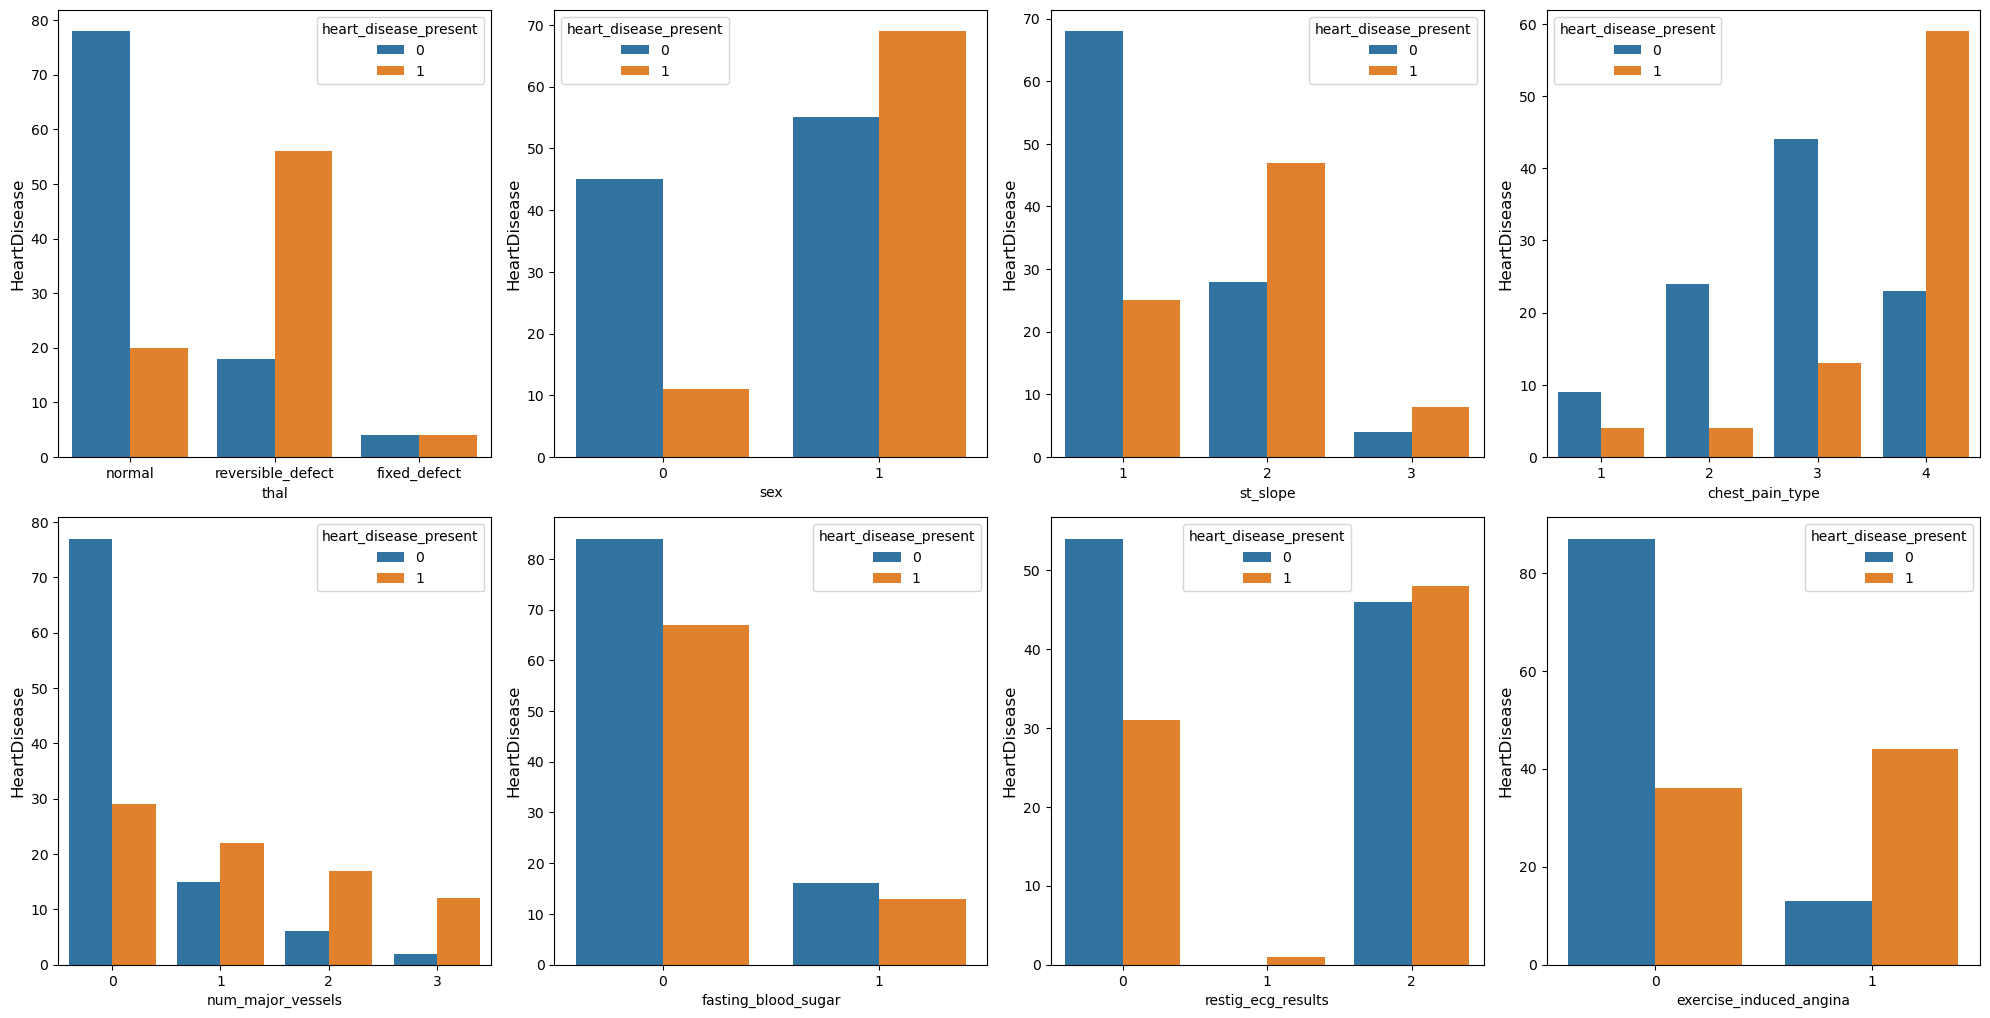

In [24]:
plt.figure(figsize=(20,20))
plotnumber = 1
for i in df_cat:
    plt.subplot(4, 4, plotnumber)
    sns.countplot(x = df_cat[i], hue = df.heart_disease_present)
    plt.ylabel('HeartDisease',fontsize=12)
    plotnumber = plotnumber+1
plt.tight_layout()

In the overall count of Thal (results of thallium stress test) patients who have heart diesese 68% belongs to reversible defect
In the overall count of Gender patients  who have heart diesese 85% belongs 1 (male) category and 15 % belongs to 0 (female) 
In the overall count of St_slope_of_peak_exercise_st_segment patients  who have heart diesese 55% belongs  category 2 and 20% belongs to category 1
In the overall count of chest pain type patients  who have heart diesese 70 % belongs to type 4 category nad 17 % belongs to type 3
The number of major vessels (0-3) colored by flourosopy patients  who have heart dieses 37% belongs to 0 class, 31% belongs to 1 class
The fasting_blood_sugar_gt_120_mg_per_dl  patients  who have heart diesese 85% belongs 0 and 15 % belongs to 1 class
In resting_ekg_results patients  who have heart dieses  62% belong to 2 class remaining 37 % belong to 0 class 
In exercise_induced_angina patients  who have heart dieses  56 % belong to 1 remaining 44 % belong to 0

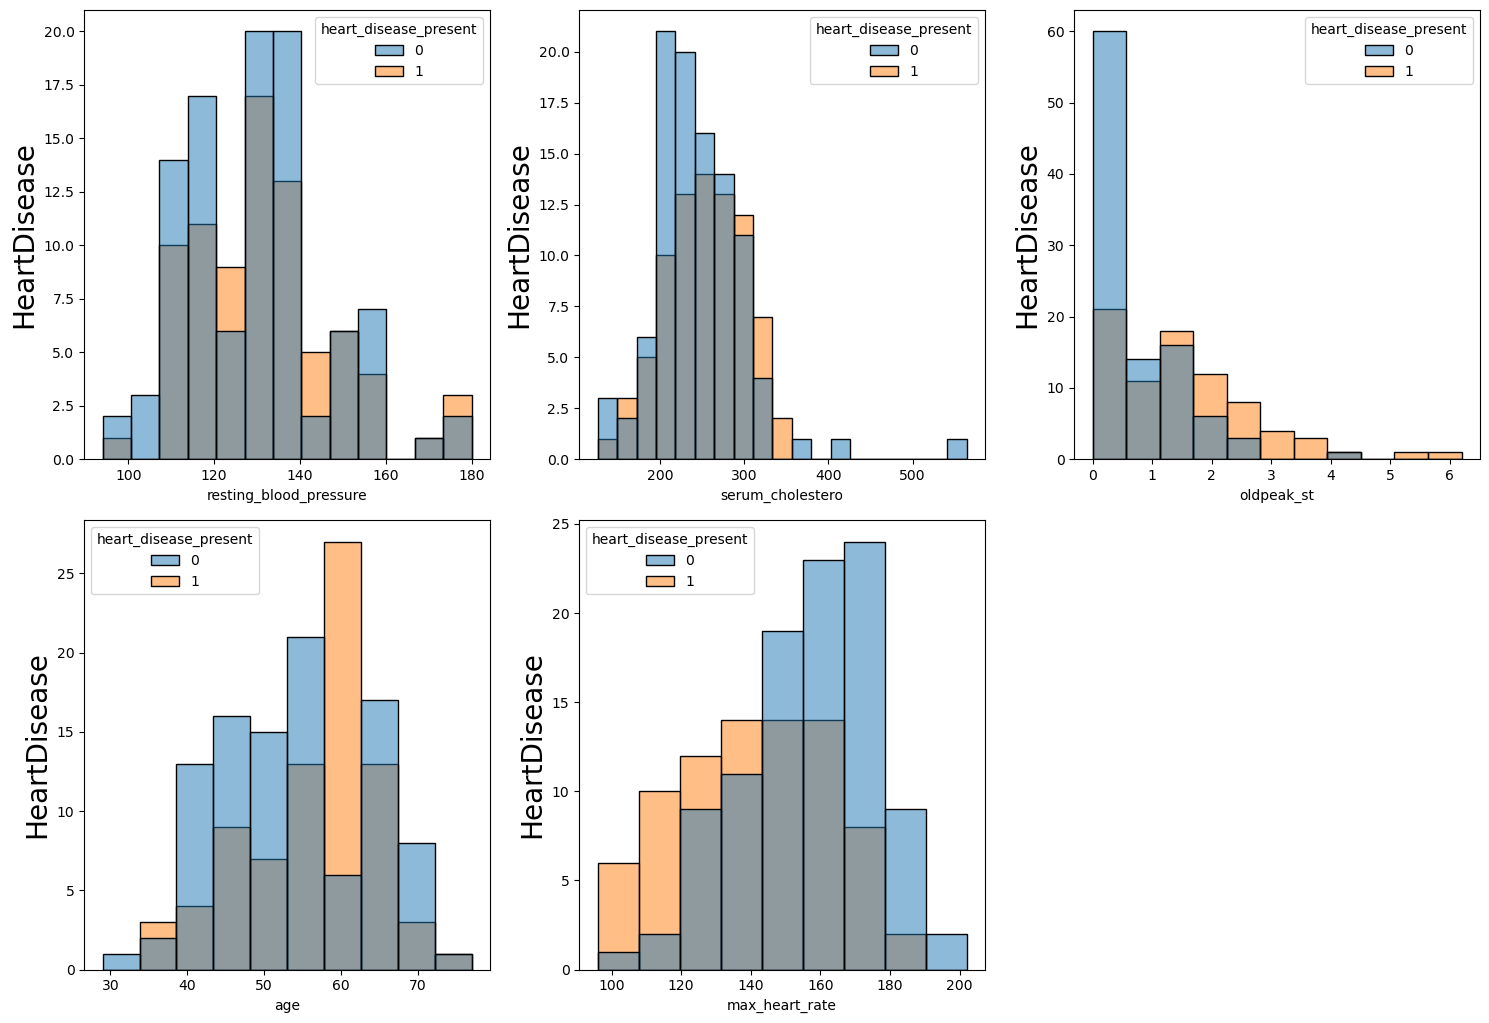

In [25]:
plt.figure(figsize=(15,15))
plotnumber = 1
for i in df_num:
    plt.subplot(3, 3, plotnumber)
    sns.histplot(x = df_num[i], hue = df.heart_disease_present)
    plt.ylabel('HeartDisease',fontsize=20)
    plotnumber = plotnumber+1
plt.tight_layout()

 Who have serum cholestrol more than 300 mg/dl have hihg chanceses of getting heart diesease
 Who have old_st_depression more than 1.5 have hihg chanceses of getting heart diesease
 The average age for heart disease patients is around 58 to 60 years
 Who have maximum heart rate(beats per minute) between 100 to 140 have hihg chanceses of getting heart diesease

## Data Preprocissing

#### Handling with null values:

In [26]:
df.isnull().sum()

st_slope                   0
thal                       0
resting_blood_pressure     0
chest_pain_type            0
num_major_vessels          0
fasting_blood_sugar        0
restig_ecg_results         0
serum_cholestero           0
oldpeak_st                 0
sex                        0
age                        0
max_heart_rate             0
exercise_induced_angina    0
heart_disease_present      0
dtype: int64

In [27]:
df.duplicated().sum()

0

#### Handling with outliers:

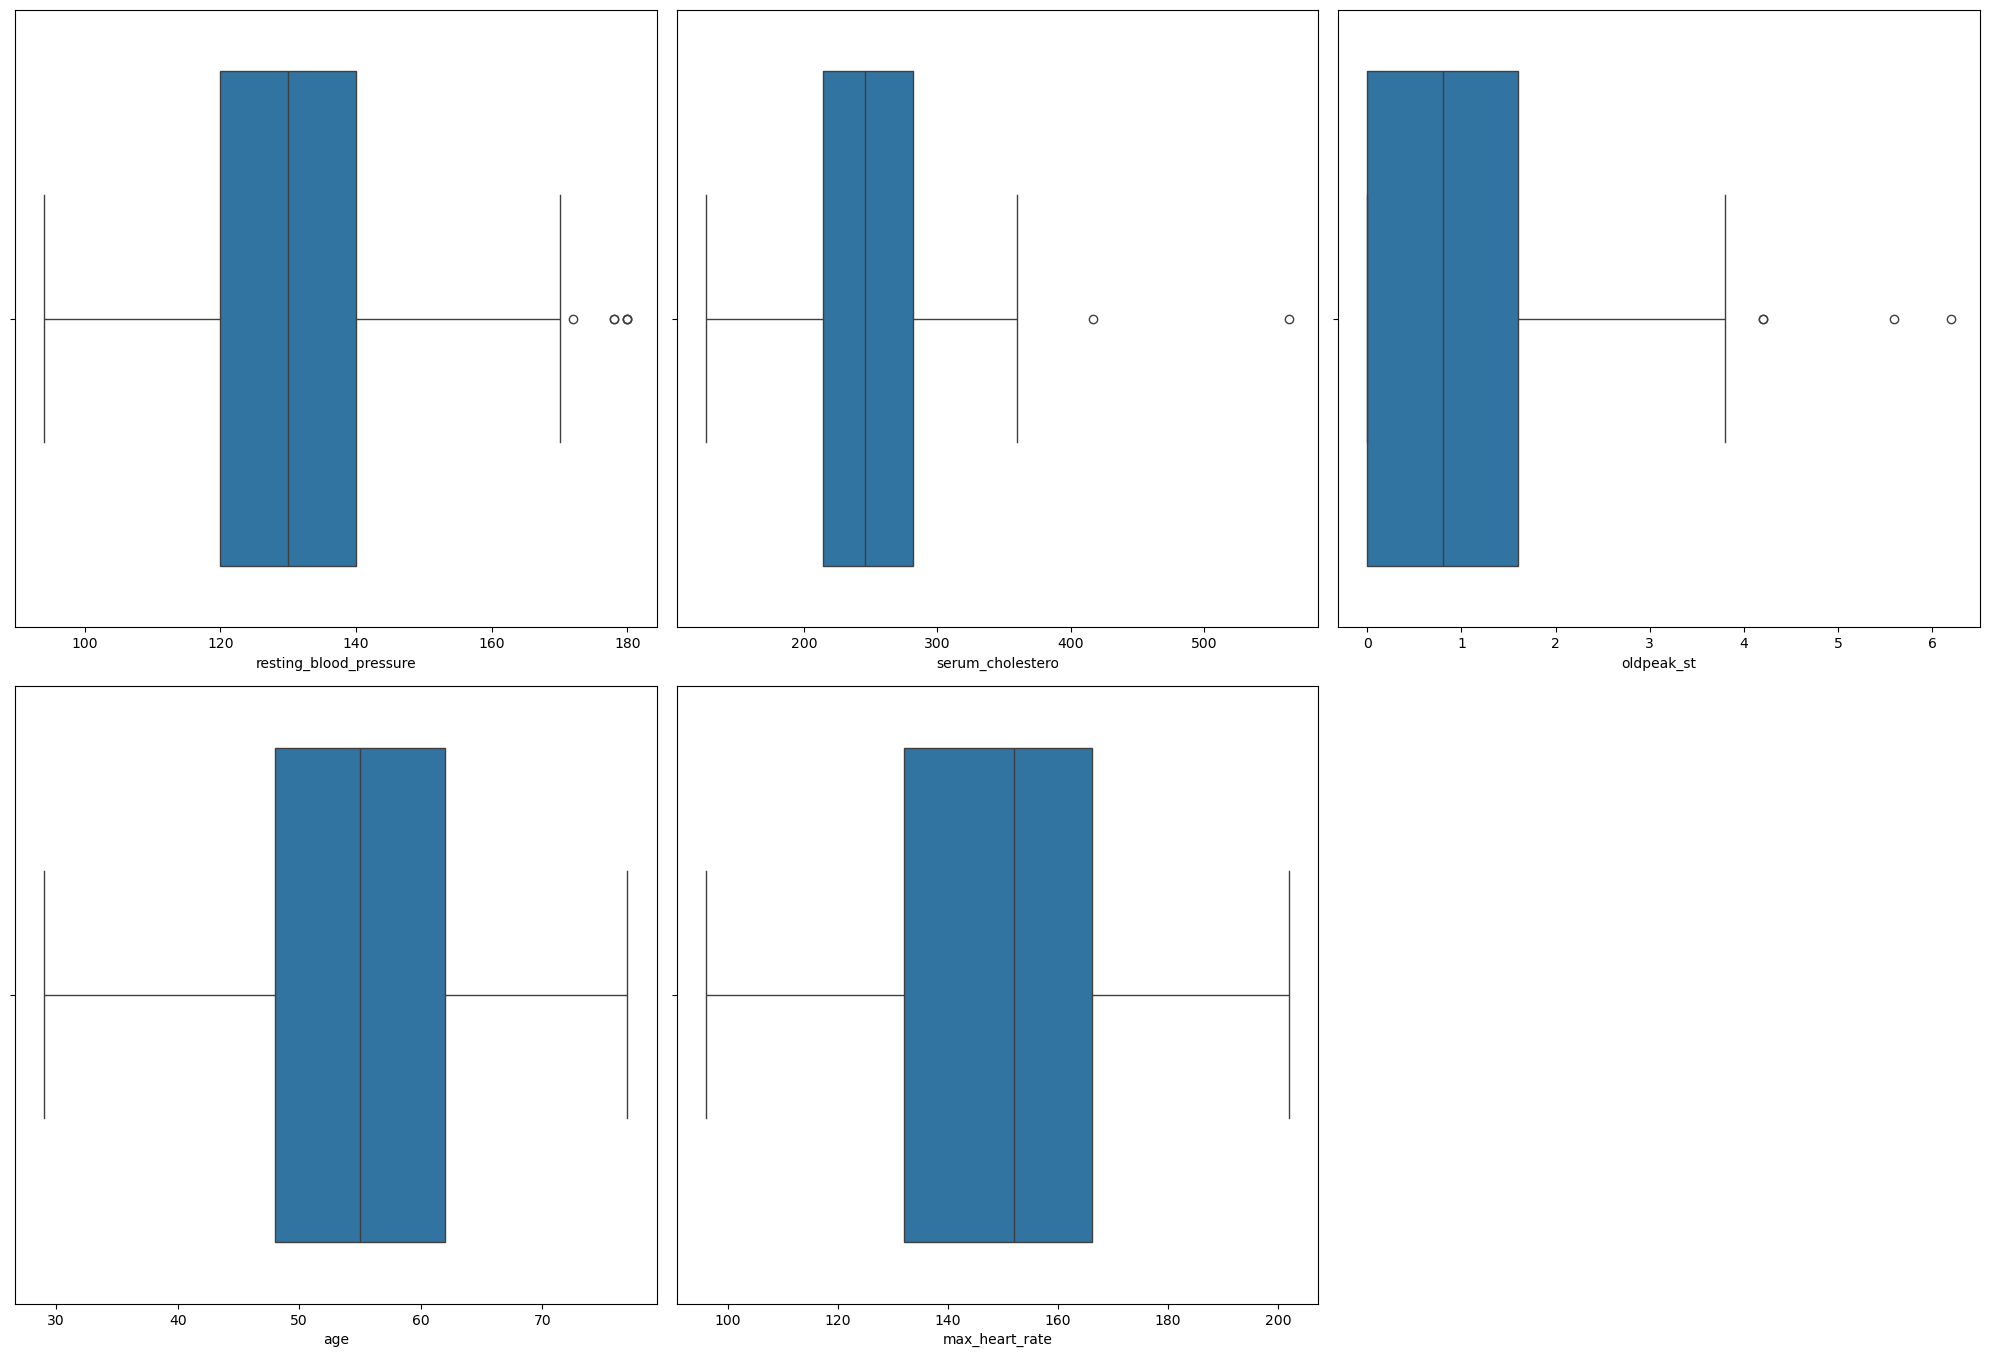

In [28]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df_num:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x=df_num[i])
    plotnumber=plotnumber+1
plt.tight_layout()    

In [29]:
def wisker(columns):
    q1,q3=np.percentile(columns,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [30]:
lw,uw=wisker(df.resting_blood_pressure)

In [31]:
print(lw,uw)

90.0 170.0


In [32]:
lw,uw=wisker(df.serum_cholestero)

In [33]:
print(lw,uw)

112.5 382.5


In [34]:
lw,uw=wisker(df.oldpeak_st)

In [35]:
print(lw,uw)

-2.4000000000000004 4.0


In [36]:
np.median(df.resting_blood_pressure)

130.0

In [37]:
np.median(df.serum_cholestero)

245.5

In [38]:
np.median(df.oldpeak_st)

0.8

In [39]:
df.loc[df.resting_blood_pressure > 170 ,'resting_blood_pressure']=np.median(df.resting_blood_pressure)

In [40]:
df.loc[df.serum_cholestero > 383 ,'serum_cholestero']=np.median(df.serum_cholestero)

In [41]:
df.loc[df.oldpeak_st > 4 ,'oldpeak_st']=np.median(df.oldpeak_st)

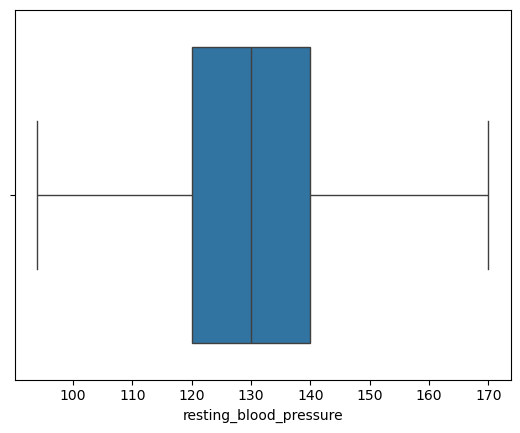

In [42]:
sns.boxplot(x=df.resting_blood_pressure) #boxplot after outlier treatment
plt.show()

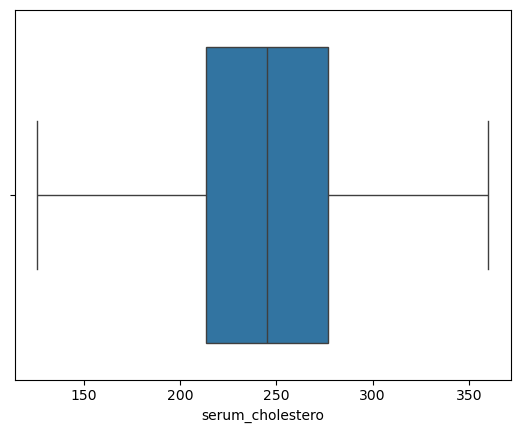

In [43]:
sns.boxplot(x=df.serum_cholestero) #boxplot after outlier treatment
plt.show()

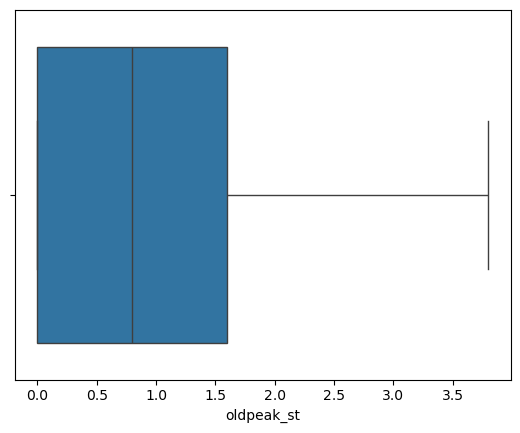

In [44]:
sns.boxplot(x=df.oldpeak_st) #boxplot after outlier treatment
plt.show()

### Encoading

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()

In [47]:
df.thal=le.fit_transform(df.thal)

#### Checking correlation

In [48]:
df.corr()

,st_slope,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,restig_ecg_results,serum_cholestero,oldpeak_st,sex,age,max_heart_rate,exercise_induced_angina,heart_disease_present
st_slope,1.000000,0.154101,0.061536,0.121207,0.076832,0.050199,0.172191,-0.047307,0.535583,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,0.154101,1.000000,-0.062529,0.269583,0.174107,-0.070225,-0.052171,0.023872,0.189707,0.265420,-0.007934,-0.142098,0.360395,0.447214
resting_blood_pressure,0.061536,-0.062529,1.000000,-0.037038,0.090367,0.096842,0.113544,0.163281,0.110505,-0.016618,0.259479,-0.014901,0.056117,0.076048
chest_pain_type,0.121207,0.269583,-0.037038,1.000000,0.249061,-0.088992,0.033379,0.081077,0.070715,0.086057,0.085001,-0.301792,0.346266,0.412829
num_major_vessels,0.076832,0.174107,0.090367,0.249061,1.000000,0.169792,0.096656,0.135630,0.167406,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar,0.050199,-0.070225,0.096842,-0.088992,0.169792,1.000000,0.053864,0.001109,-0.002458,0.066010,0.176101,0.058369,-0.005956,0.003379
restig_ecg_results,0.172191,-0.052171,0.113544,0.033379,0.096656,0.053864,1.000000,0.141028,0.118666,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholestero,-0.047307,0.023872,0.163281,0.081077,0.135630,0.001109,0.141028,1.000000,-0.006879,-0.087374,0.200082,-0.108363,0.137476,0.146419
oldpeak_st,0.535583,0.189707,0.110505,0.070715,0.167406,-0.002458,0.118666,-0.006879,1.000000,0.121071,0.202029,-0.324242,0.263756,0.388253
sex,0.093340,0.265420,-0.016618,0.086057,0.073107,0.066010,0.045786,-0.087374,0.121071,1.000000,-0.148997,-0.053960,0.251096,0.335421


<Axes: >

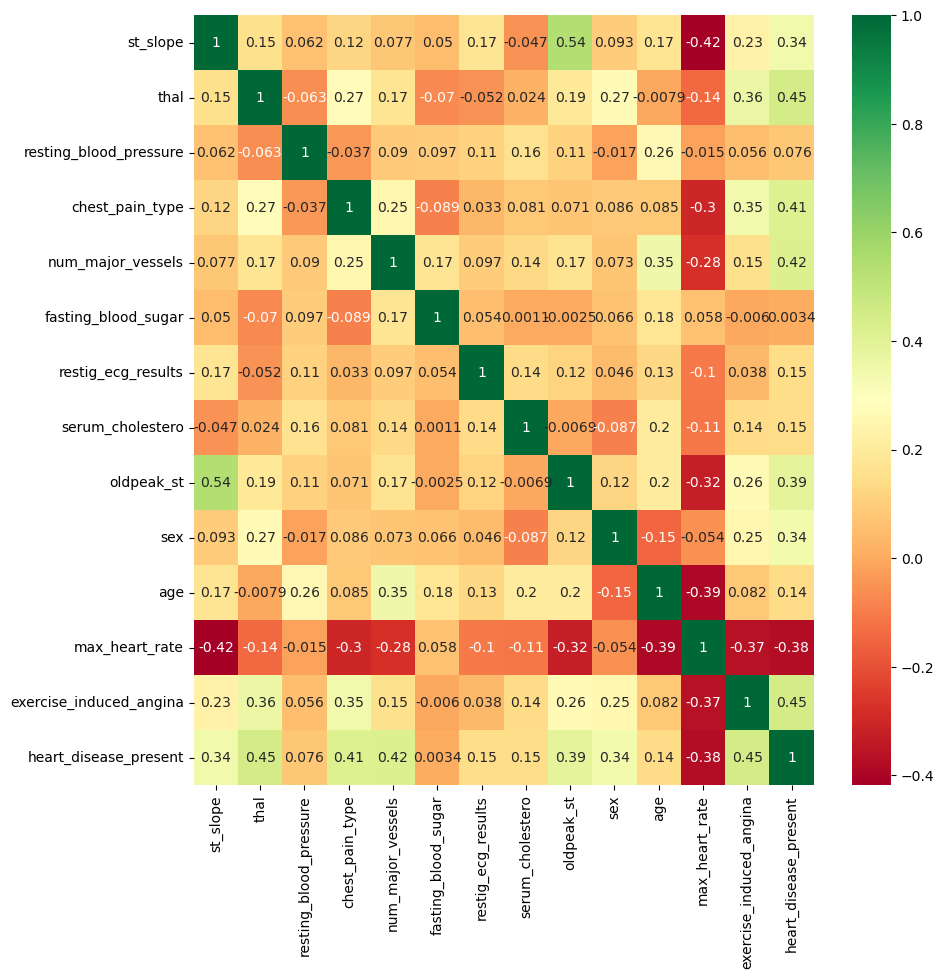

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True , cmap='RdYlGn')

<Axes: title={'center': 'Correlation with target'}>

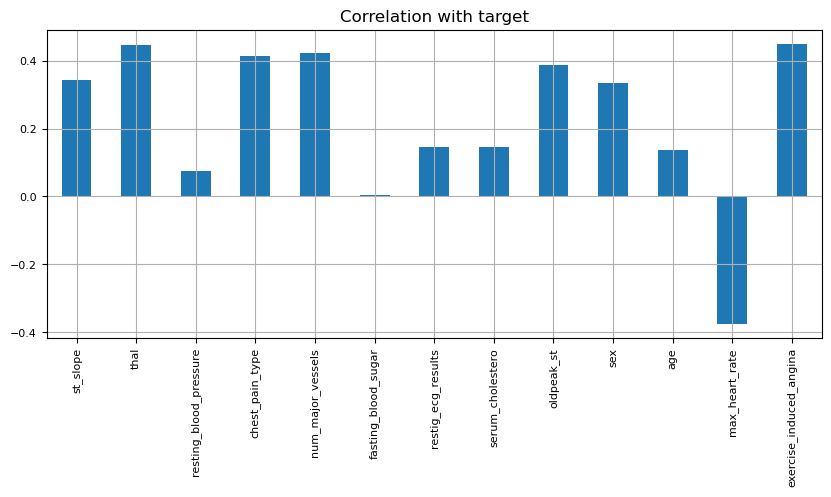

In [50]:
df.drop('heart_disease_present', axis=1).corrwith(df.heart_disease_present).plot(kind='bar',fontsize = 8, grid=True, figsize=(10, 4), 
                                                   title="Correlation with target")

fasting_blood_sugar have least corelated to target variable and remaining have significance correlation with target variable

In [51]:
df=pd.get_dummies(df,columns=['st_slope','thal','chest_pain_type','num_major_vessels','restig_ecg_results','sex','exercise_induced_angina'])

In [52]:
pd.set_option('display.max_columns',None,)

In [53]:
df.head()

,resting_blood_pressure,fasting_blood_sugar,serum_cholestero,oldpeak_st,age,max_heart_rate,heart_disease_present,st_slope_1,st_slope_2,st_slope_3,thal_0,thal_1,thal_2,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,restig_ecg_results_0,restig_ecg_results_1,restig_ecg_results_2,sex_0,sex_1,exercise_induced_angina_0,exercise_induced_angina_1
0,128,0,308.0,0.0,45,170,0,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,True,False
1,110,0,214.0,1.6,54,158,0,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,True,False
2,125,0,304.0,0.0,77,162,1,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,True
3,152,0,223.0,0.0,40,181,1,True,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,True,True,False
4,130,0,270.0,0.8,59,145,0,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,False


In [54]:
df.shape

(180, 28)

## Model Creation

In [89]:
x= df.drop('heart_disease_present',axis = 1)
y = df.heart_disease_present

#### Train Test Split

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.20,random_state=18)

In [58]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
heart_disease_present
0    80
1    64
Name: count, dtype: int64
Distribution of traget variable in test set
heart_disease_present
0    20
1    16
Name: count, dtype: int64


In [59]:
print('------------Training Set------------------')
print(x_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(x_test.shape)
print(y_test.shape)

------------Training Set------------------
(144, 27)
(144,)
------------Test Set------------------
(36, 27)
(36,)


#### Balancing

##### The dataset is balanced so no need to do balancing the data

#### Scalling(feature normalization)

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
ms = MinMaxScaler()

In [92]:
x_train[['resting_blood_pressure','serum_cholestero','oldpeak_st','age','max_heart_rate']]=ms.fit_transform(x_train[['resting_blood_pressure','serum_cholestero','oldpeak_st','age','max_heart_rate']])
x_train.head()


,resting_blood_pressure,fasting_blood_sugar,serum_cholestero,oldpeak_st,age,max_heart_rate,st_slope_1,st_slope_2,st_slope_3,thal_0,thal_1,thal_2,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,restig_ecg_results_0,restig_ecg_results_1,restig_ecg_results_2,sex_0,sex_1,exercise_induced_angina_0,exercise_induced_angina_1
17,0.473684,0,0.542735,0.368421,0.645833,0.414141,True,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False,True
160,0.473684,0,0.598291,0.157895,0.416667,0.686869,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False
44,0.184211,0,0.602564,0.000000,0.520833,0.646465,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,True,False,True,False
67,0.276316,0,0.756410,0.315789,0.291667,0.787879,False,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,True,False
179,0.868421,0,0.320513,0.000000,0.520833,0.606061,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False


In [93]:
x_test[['resting_blood_pressure','serum_cholestero','oldpeak_st','age','max_heart_rate']]=ms.fit_transform(x_test[['resting_blood_pressure','serum_cholestero','oldpeak_st','age','max_heart_rate']])
x_test.head()


,resting_blood_pressure,fasting_blood_sugar,serum_cholestero,oldpeak_st,age,max_heart_rate,st_slope_1,st_slope_2,st_slope_3,thal_0,thal_1,thal_2,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,restig_ecg_results_0,restig_ecg_results_1,restig_ecg_results_2,sex_0,sex_1,exercise_induced_angina_0,exercise_induced_angina_1
127,0.20,0,0.538922,0.1250,0.428571,0.579545,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,True,True,False
78,0.70,0,0.682635,0.8750,0.600000,0.522727,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True
88,0.80,0,0.000000,0.5000,0.514286,0.886364,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,True,False
120,0.56,1,0.682635,0.4375,0.742857,0.886364,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,True,True,False
12,0.60,0,1.000000,0.0000,0.714286,0.704545,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,True,False


#### Model initializing

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

def initialize_baseline_models():
    """
    Initializes a list of baseline machine learning models with default or typical hyperparameters.
    
    Returns:
        list: A list of tuples where each tuple contains the name of the model and the model instance.
    """
    models = []
    
    # Logistic Regression with L2 regularization
    models.append(('Logistic Regression L2', LogisticRegression(penalty='l2', solver='liblinear')))
    
    # K-Nearest Neighbors with varying numbers of neighbors 
    models.append(('KNN7'  ,  KNeighborsClassifier(7)))
    models.append(('KNN5'  ,  KNeighborsClassifier(5)))
    models.append(('KNN9'  ,  KNeighborsClassifier(9)))
    models.append(('KNN11'  , KNeighborsClassifier(11)))

    # Support Vector Machine with linear and RBF kernels
    models.append(('SVM Linear', SVC(kernel='linear', gamma='auto', probability=True)))
    models.append(('SVM RBF', SVC(kernel='rbf', gamma='auto', probability=True)))
    
    # Naive Bayes
    models.append(('Naive Bayes', GaussianNB()))
    
    # Decision Tree
    models.append(('Decision Tree', DecisionTreeClassifier()))
    
    # Gradient Boosting Machine with default parameters
    models.append(('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, max_features='sqrt')))
    
    # Random Forest with different criteria
    models.append(('Random Forest (Entropy)', RandomForestClassifier(criterion='entropy', n_estimators=100)))
    models.append(('Random Forest (Gini)', RandomForestClassifier(criterion='gini', n_estimators=100)))
    
    # XGBoost with varying numbers of estimators

    
    models.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    models.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    models.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    models.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    
    # Multi-layer Perceptron
    models.append(('MLP', MLPClassifier()))
    
    return models

In [95]:
models = initialize_baseline_models()

for name, model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'{name} Accuracy: {accuracy:.4f}')

Logistic Regression L2 Accuracy: 0.8056
KNN7 Accuracy: 0.7222
KNN5 Accuracy: 0.7500
KNN9 Accuracy: 0.7500
KNN11 Accuracy: 0.7500
SVM Linear Accuracy: 0.8333
SVM RBF Accuracy: 0.8611
Naive Bayes Accuracy: 0.6944
Decision Tree Accuracy: 0.8333
Gradient Boosting Accuracy: 0.7778
Random Forest (Entropy) Accuracy: 0.6944
Random Forest (Gini) Accuracy: 0.7222
XGB_2000 Accuracy: 0.7778
XGB_500 Accuracy: 0.7500
XGB_100 Accuracy: 0.7500
XGB_1000 Accuracy: 0.7500
MLP Accuracy: 0.8333


### cross validation

In [96]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

def evaluate_models_with_cross_validation(x, y, models, cv_folds=5):
    """
    Evaluates a list of machine learning models using 5-fold cross-validation.
    
    Args:
        X (array-like): Feature matrix.
        y (array-like): Target vector.
        models (list of tuples): List of tuples where each tuple contains the name of the model and the model instance.
        cv_folds (int): Number of cross-validation folds (default is 5).
    
    Returns:
        dict: A dictionary where keys are model names and values are lists of cross-validation scores.
    """
    results = {}
    
    for name, model in models:
        scores = cross_val_score(model, x, y, cv=cv_folds, scoring='accuracy')
        results[name] = scores
        print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")
    
    return results

In [97]:
    
# Initialize models
models = initialize_baseline_models()
    
# Evaluate models with 5-fold cross-validation

results = evaluate_models_with_cross_validation(x, y, models)

Logistic Regression L2: Mean Accuracy = 0.8333, Std Dev = 0.0609
KNN7: Mean Accuracy = 0.6222, Std Dev = 0.0671
KNN5: Mean Accuracy = 0.5833, Std Dev = 0.0680
KNN9: Mean Accuracy = 0.6111, Std Dev = 0.0497
KNN11: Mean Accuracy = 0.6111, Std Dev = 0.0583
SVM Linear: Mean Accuracy = 0.7944, Std Dev = 0.0515
SVM RBF: Mean Accuracy = 0.5778, Std Dev = 0.0208
Naive Bayes: Mean Accuracy = 0.8111, Std Dev = 0.0793
Decision Tree: Mean Accuracy = 0.7111, Std Dev = 0.0484
Gradient Boosting: Mean Accuracy = 0.7833, Std Dev = 0.0667
Random Forest (Entropy): Mean Accuracy = 0.8167, Std Dev = 0.0624
Random Forest (Gini): Mean Accuracy = 0.8111, Std Dev = 0.0813
XGB_2000: Mean Accuracy = 0.7944, Std Dev = 0.0797
XGB_500: Mean Accuracy = 0.8056, Std Dev = 0.0805
XGB_100: Mean Accuracy = 0.8056, Std Dev = 0.0843
XGB_1000: Mean Accuracy = 0.8111, Std Dev = 0.0774
MLP: Mean Accuracy = 0.8056, Std Dev = 0.0930


## Model building

#### Logistic Regression

In [98]:
LR = LogisticRegression(penalty='l2')
LR.fit(x_train,y_train)
y_pred_LR=LR.predict(x_test)

### KNN

In [99]:
KNN = KNeighborsClassifier(7)
KNN.fit(x_train,y_train)
y_pred_KNN = KNN.predict(x_test)

### SVM

In [101]:
svm = SVC(kernel='linear',gamma='auto',probability=True)
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)

### DecissionTree

In [102]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred_DT = DT.predict(x_test)

### RandomForest

In [103]:
RF = RandomForestClassifier(criterion='entropy',n_estimators=100)
RF.fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)

### Naive Bayes

In [104]:
NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred_NB=NB.predict(x_test)

### GB

In [105]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(x_train,y_train)
y_pred_gbm = gbm.predict(x_test)

### XGB

In [107]:
import xgboost as xgb
xgb = xgb.XGBClassifier( n_estimators=1000)
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

### MLP(ANN)

In [108]:
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
y_pred_mlp = mlp.predict(x_test)

## MODEL EVALUATION

### Logistic Regression evaluation

,Model,Accuracy,Precision,Recal,F1 Score,ROC,Log_Loss
0,Logisric Regression,0.805556,0.8,0.75,0.774194,0.8,7.008488


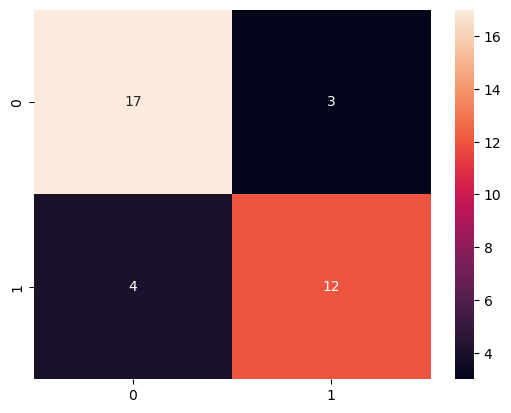

In [109]:
CM=confusion_matrix(y_test,y_pred_LR)
sns.heatmap(CM, annot=True)

TP = CM[1][1]
FN = CM[1][0]
FP = CM[0][1]
TN = CM[0][0]

acc= accuracy_score(y_test, y_pred_LR)
prec = precision_score(y_test, y_pred_LR)
rec = recall_score(y_test, y_pred_LR)
f1 = f1_score(y_test, y_pred_LR)
roc=roc_auc_score(y_test, y_pred_LR)
loss_log = log_loss(y_test, y_pred_LR)

model_results_LR =pd.DataFrame([['Logisric Regression',acc, prec,rec, f1,roc, loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Recal', 'F1 Score','ROC','Log_Loss'])

model_results_LR

### KNN Evaluation

,Model,Accuracy,Precision,Recal,F1 Score,ROC,Log_Loss
0,KNN,0.722222,0.666667,0.75,0.705882,0.725,10.012126


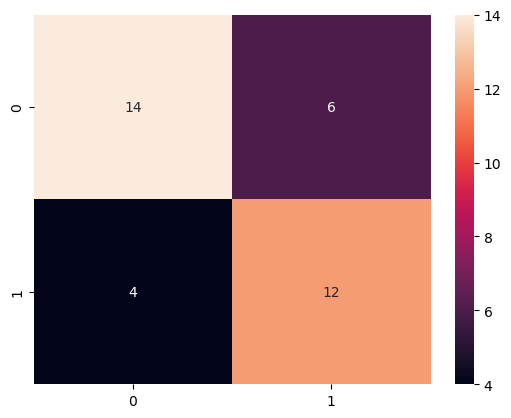

In [110]:
CM=confusion_matrix(y_test,y_pred_KNN)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

acc= accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)
roc=roc_auc_score(y_test, y_pred_KNN)
loss_log = log_loss(y_test, y_pred_KNN)

model_results_KNN =pd.DataFrame([['KNN',acc, prec,rec, f1,roc, loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Recal', 'F1 Score','ROC','Log_Loss'])

model_results_KNN

### SVM Evaluation

,Model,Accuracy,Precision,Recal,F1 Score,ROC,Log_Loss
0,SVM,0.833333,0.857143,0.75,0.8,0.825,6.007276


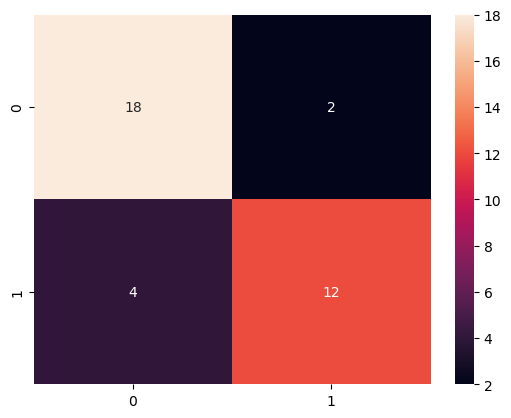

In [111]:
CM=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

acc= accuracy_score(y_test, y_pred_svm)
prec = precision_score(y_test, y_pred_svm)
rec = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
roc=roc_auc_score(y_test, y_pred_svm)
loss_log = log_loss(y_test, y_pred_svm)

model_results_svm =pd.DataFrame([['SVM',acc, prec,rec, f1,roc, loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Recal', 'F1 Score','ROC','Log_Loss'])

model_results_svm

### Decission Tree Evaluation

,Model,Accuracy,Precision,Recal,F1 Score,ROC,Log_Loss
0,DecisionTree,0.861111,0.923077,0.75,0.827586,0.85,5.006063


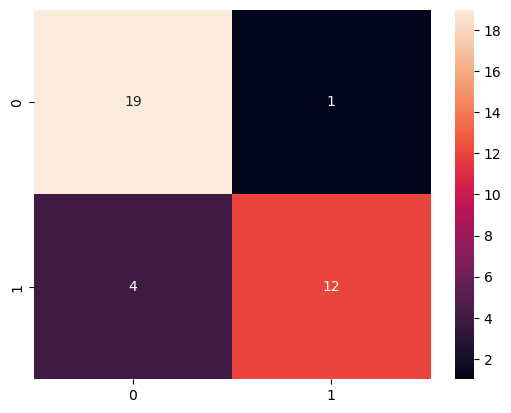

In [112]:
CM=confusion_matrix(y_test,y_pred_DT)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

acc= accuracy_score(y_test, y_pred_DT)
prec = precision_score(y_test, y_pred_DT)
rec = recall_score(y_test, y_pred_DT)
f1 = f1_score(y_test, y_pred_DT)
roc=roc_auc_score(y_test, y_pred_DT)
loss_log = log_loss(y_test, y_pred_DT)

model_results_DT =pd.DataFrame([['DecisionTree',acc, prec,rec, f1,roc, loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Recal', 'F1 Score','ROC','Log_Loss'])

model_results_DT

### RandomForest Evaluation

,Model,Accuracy,Precision,Recal,F1 Score,ROC,Log_Loss
0,RandomForest,0.75,0.769231,0.625,0.689655,0.7375,9.010913


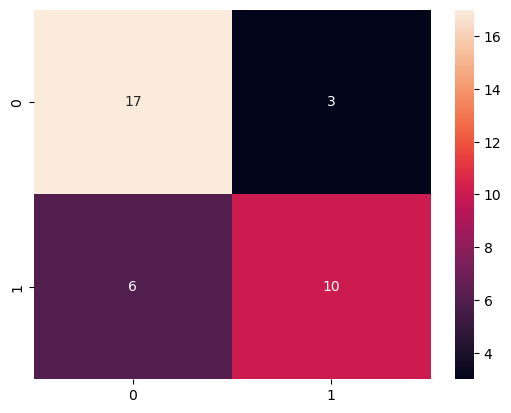

In [113]:
CM=confusion_matrix(y_test,y_pred_RF)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

acc= accuracy_score(y_test, y_pred_RF)
prec = precision_score(y_test, y_pred_RF)
rec = recall_score(y_test, y_pred_RF)
f1 = f1_score(y_test, y_pred_RF)
roc=roc_auc_score(y_test, y_pred_RF)
loss_log = log_loss(y_test, y_pred_RF)

model_results_RF =pd.DataFrame([['RandomForest',acc, prec,rec, f1,roc, loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Recal', 'F1 Score','ROC','Log_Loss'])

model_results_RF

### Naive Bayes Evaluation

,Model,Accuracy,Precision,Recal,F1 Score,ROC,Log_Loss
0,NB,0.694444,0.857143,0.375,0.521739,0.6625,11.013339


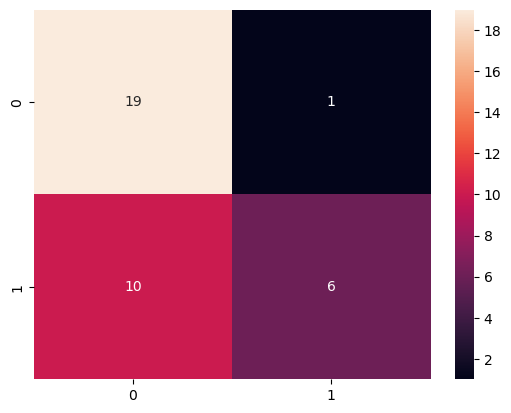

In [114]:
CM=confusion_matrix(y_test,y_pred_NB)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

acc= accuracy_score(y_test, y_pred_NB)
prec = precision_score(y_test, y_pred_NB)
rec = recall_score(y_test, y_pred_NB)
f1 = f1_score(y_test, y_pred_NB)
roc=roc_auc_score(y_test, y_pred_NB)
loss_log = log_loss(y_test, y_pred_NB)

model_results_NB =pd.DataFrame([['NB',acc, prec,rec, f1,roc, loss_log]],
                 columns = ['Model', 'Accuracy','Precision', 'Recal', 'F1 Score','ROC','Log_Loss'])

model_results_NB

### GB Evaluation

,Model,Accuracy,Precision,Recal,F1 Score,ROC,Log_Loss
0,GB,0.805556,0.8,0.75,0.774194,0.8,7.008488


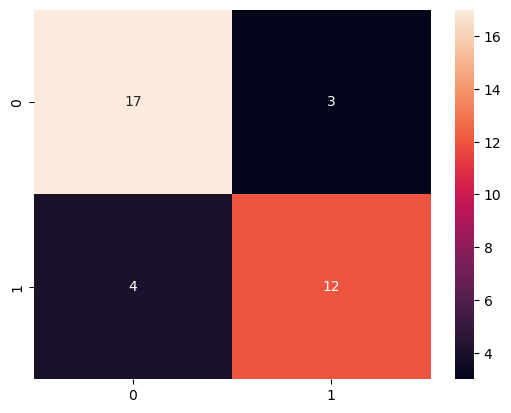

In [115]:
CM=confusion_matrix(y_test,y_pred_gbm)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

acc= accuracy_score(y_test, y_pred_gbm)
prec = precision_score(y_test, y_pred_gbm)
rec = recall_score(y_test, y_pred_gbm)
f1 = f1_score(y_test, y_pred_gbm)
roc=roc_auc_score(y_test, y_pred_gbm)
loss_log = log_loss(y_test, y_pred_gbm)

model_results_GB =pd.DataFrame([['GB',acc, prec,rec, f1,roc, loss_log]],
                 columns = ['Model', 'Accuracy','Precision', 'Recal', 'F1 Score','ROC','Log_Loss'])

model_results_GB

### XGB Evaluation

,Model,Accuracy,Precision,Recal,F1 Score,ROC,Log_Loss
0,XGB,0.75,0.769231,0.625,0.689655,0.7375,9.010913


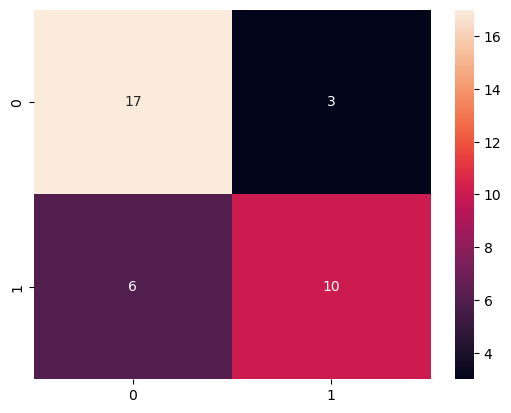

In [116]:
CM=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

acc= accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc=roc_auc_score(y_test, y_pred_xgb)
loss_log = log_loss(y_test, y_pred_xgb)

model_results_XGB =pd.DataFrame([['XGB',acc, prec,rec, f1,roc, loss_log]],
                 columns = ['Model', 'Accuracy','Precision', 'Recal', 'F1 Score','ROC','Log_Loss'])

model_results_XGB

### MLP(ANN) Evaluation

,Model,Accuracy,Precision,Recal,F1 Score,ROC,Log_Loss
0,MLP(ANN),0.861111,0.866667,0.8125,0.83871,0.85625,5.006063


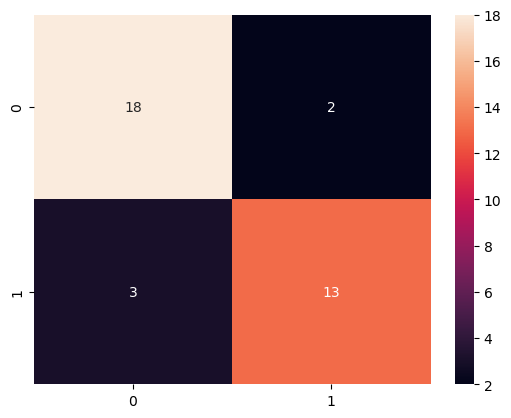

In [117]:
CM=confusion_matrix(y_test,y_pred_mlp)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

acc= accuracy_score(y_test, y_pred_mlp)
prec = precision_score(y_test, y_pred_mlp)
rec = recall_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp)
roc=roc_auc_score(y_test, y_pred_mlp)
loss_log = log_loss(y_test, y_pred_mlp)

model_results_mlp =pd.DataFrame([['MLP(ANN)',acc, prec,rec, f1,roc, loss_log]],
                 columns = ['Model', 'Accuracy','Precision', 'Recal', 'F1 Score','ROC','Log_Loss'])

model_results_mlp

## Model Comparison Report

In [118]:
data = {        'LR': y_pred_LR, 
                'KNN': y_pred_KNN,
                'SVM': y_pred_svm, 
                'DT': y_pred_DT, 
                'RF': y_pred_RF,
                'NB': y_pred_NB, 
                'GBM': y_pred_gbm, 
                'XGB': y_pred_xgb,
                'MLP': y_pred_mlp}

models = pd.DataFrame(data) 

In [120]:
 ##Initialize an empty DataFrame to hold results

model_comparison = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC', 'Log_Loss'])

# Iterate through each model's predictions

for column in models:
    CM = confusion_matrix(y_test, models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
   

    acc = accuracy_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    roc = roc_auc_score(y_test, models[column])
    loss_log = log_loss(y_test, models[column])
    
    # Create a DataFrame for the current model's results
    results = pd.DataFrame([[column, acc, prec, rec, f1, roc, loss_log]],
                           columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC', 'Log_Loss'])
    
    # Append the results to the overall results DataFrame
    
    model_comparison = pd.concat([model_comparison,results], ignore_index=True)

# Display the results DataFrame
model_comparison

,Model,Accuracy,Precision,Recall,F1 Score,ROC,Log_Loss
0,LR,0.805556,0.800000,0.7500,0.774194,0.80000,7.008488
1,KNN,0.722222,0.666667,0.7500,0.705882,0.72500,10.012126
2,SVM,0.833333,0.857143,0.7500,0.800000,0.82500,6.007276
3,DT,0.861111,0.923077,0.7500,0.827586,0.85000,5.006063
4,RF,0.750000,0.769231,0.6250,0.689655,0.73750,9.010913
5,NB,0.694444,0.857143,0.3750,0.521739,0.66250,11.013339
6,GBM,0.805556,0.800000,0.7500,0.774194,0.80000,7.008488
7,XGB,0.750000,0.769231,0.6250,0.689655,0.73750,9.010913
8,MLP,0.861111,0.866667,0.8125,0.838710,0.85625,5.006063


AS we can see from above results, MLP Classifier is best performer as it has highest test accuracy of 0.86, Recall of 0.0.81 and and highest f1-score of 0.83 and lowest Log Loss of 5.00.

### Feature Importance

Feature importance is a key concept in machine learning, especially in tree-based models like Random Forests, Gradient Boosting Machines, and XGBoost. It helps in understanding which features (variables) contribute the most to the model's predictions.

<Axes: >

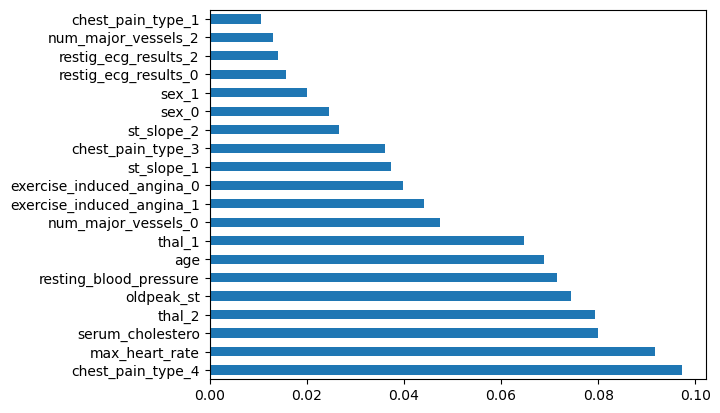

In [121]:
feat_importances = pd.Series(RF.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Conclusion

AS we can see from above results, MLP Classifier is best performer as it has highest test accuracy of 0.86, Recall of 0.0.81 and and highest f1-score of 0.83 and lowest Log Loss of 5.00.
We have also second best performing model i.e random forest algorithm
The top 5 most contribution features are:
1.Chest pain type 4
2.Max heart rate
3.serom cholestrol
4.thal 2
5.oldpeak_eq_st_depression 

## Challenges faced While doing project

1. Undestandind the dataset description(For overcome this  we researched each feature importance from different resources )
2. Data-availability remains a major problem for modernizing health care systems using artificial intelligence, especially clean, structured datasets      for supervised learning.
3. Data cleaning (For overcome this we used some data pre-processing techniques)
4. Getting insights from dataset(for overcome this we used some uni and bi-variant analysis techniques )
5. After fitting the all models then while performing model evaluation there is some minor changes occering in metric scores 